In [186]:
from pathlib import Path
import shutil
import traceback
import click
import cv2
from tqdm import tqdm
from womad_feedback.average import crop_region
from womad_feedback.src_images import IMAGES, IMAGE_PATH
import yaml
import numpy as np
from womad_feedback.align import ImageAligner
from womad_feedback.regions import RegionExtractor, region_definitions
import matplotlib.pyplot as plt
%matplotlib inline 


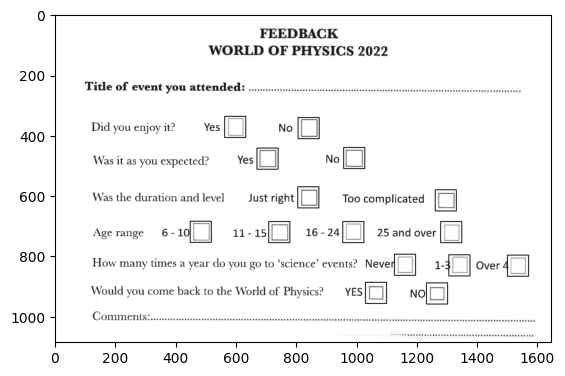

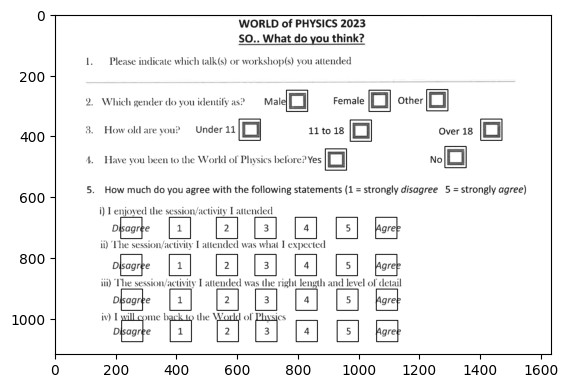

In [189]:
extractor = RegionExtractor()
img = extractor.markup_image_regions('2022')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
img = extractor.markup_image_regions('2023')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)


'2023_q2_q1m'

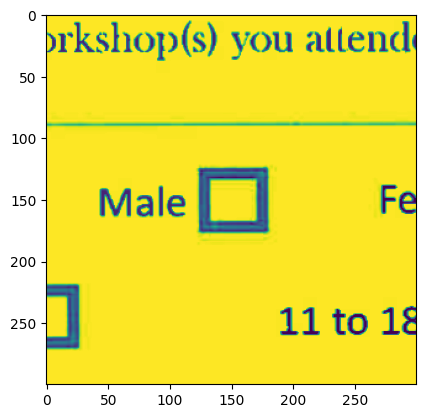

'2023_q2_q1f'

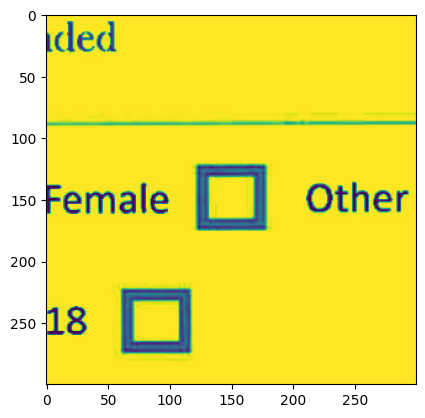

'2023_q2_q1o'

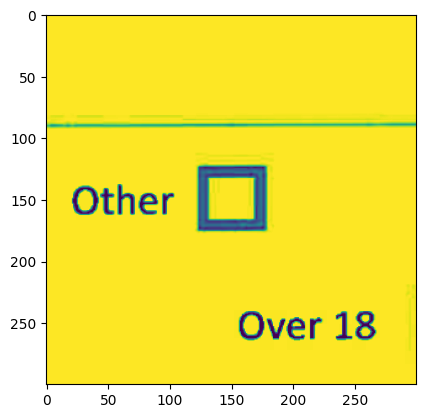

'2023_q3_young'

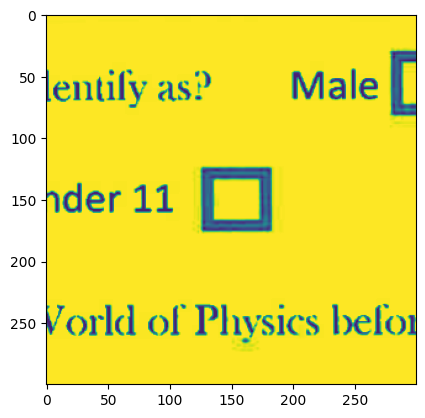

'2023_q3_eleven'

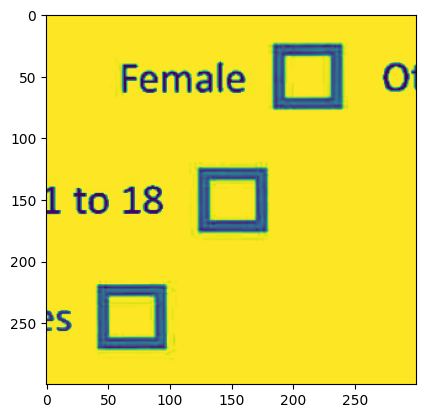

'2023_q3_old'

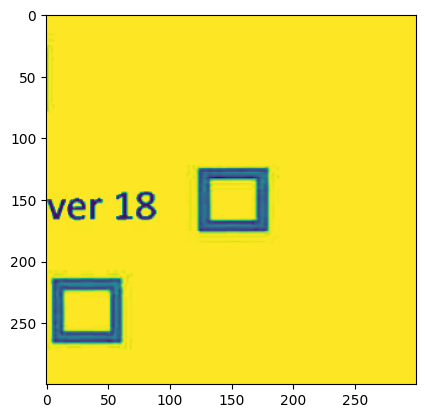

'2023_q4_y'

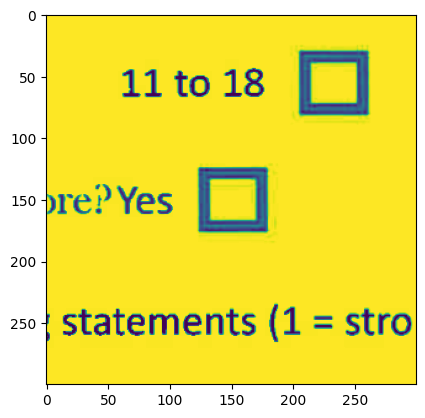

'2023_q4_n'

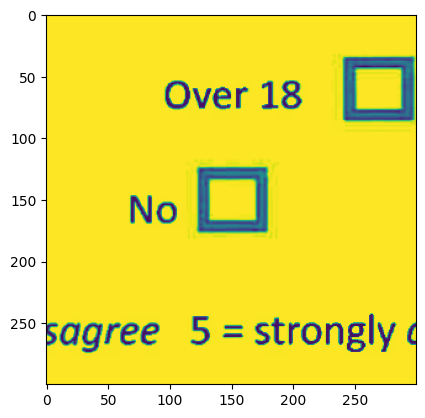

'2023_q5_disagree'

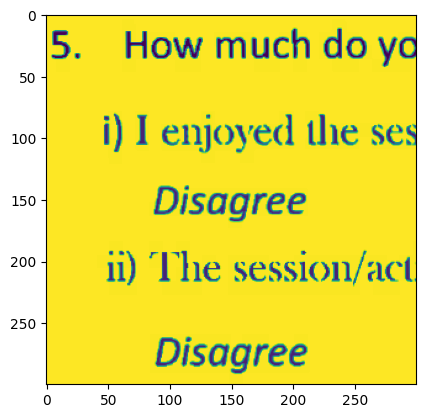

'2023_q5_agree'

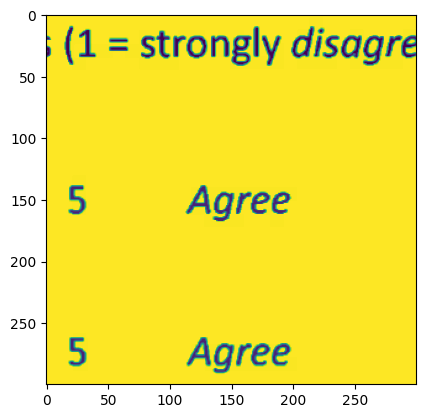

'2023_q5_1'

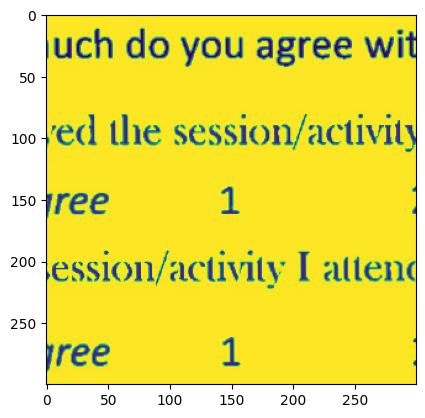

'2023_q5_2'

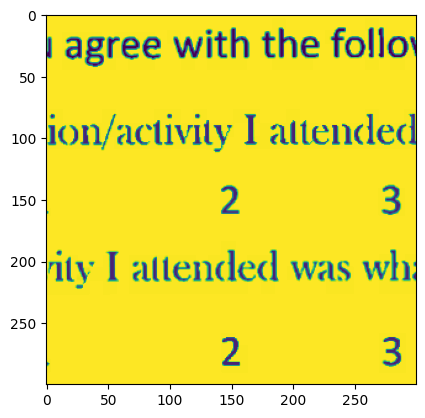

'2023_q5_3'

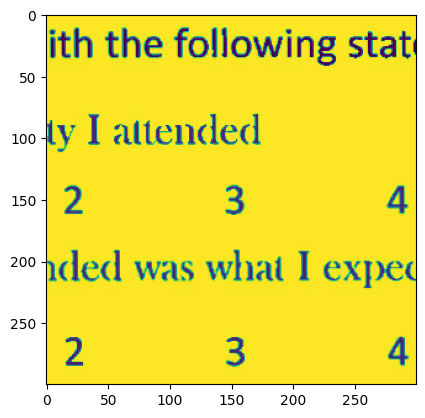

'2023_q5_4'

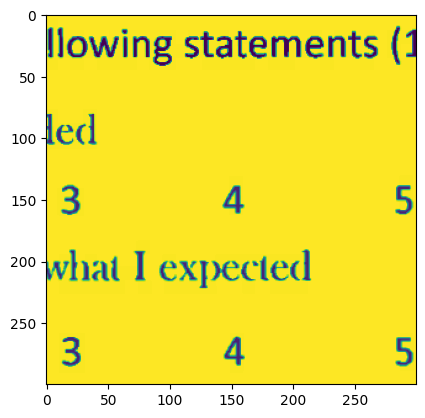

'2023_q5_5'

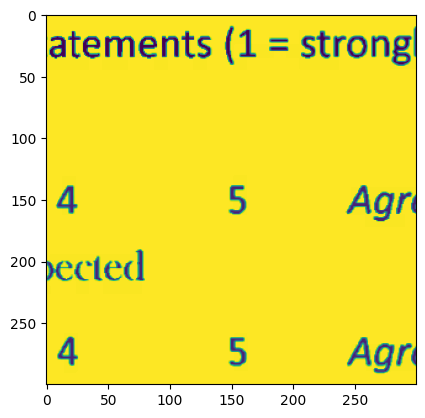

'2023_q6_disagree'

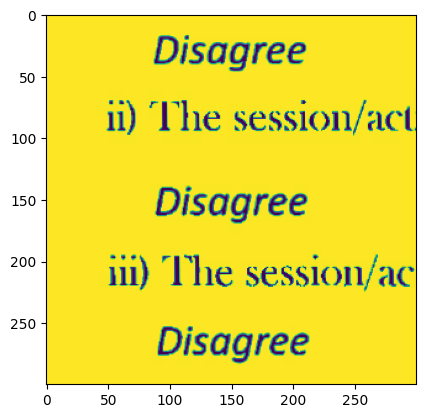

'2023_q6_agree'

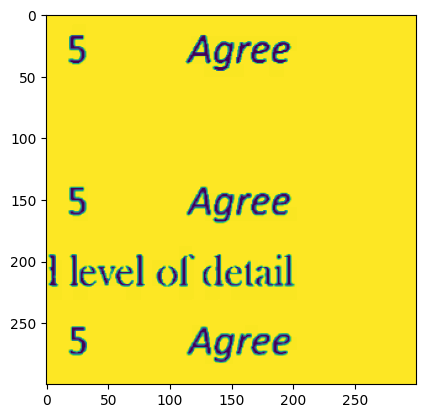

'2023_q6_1'

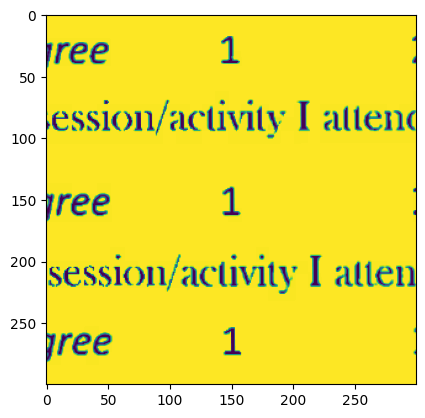

'2023_q6_2'

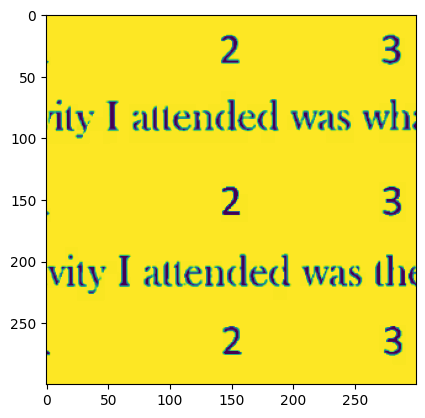

'2023_q6_3'

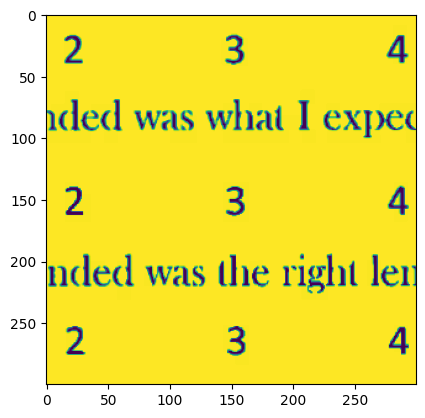

'2023_q6_4'

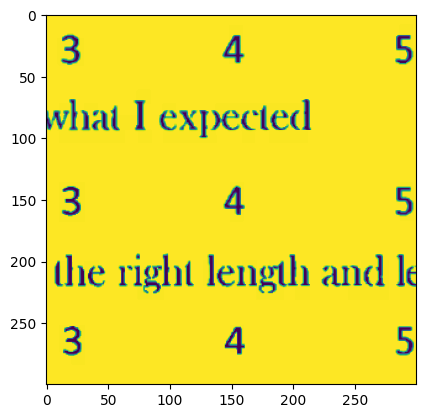

'2023_q6_5'

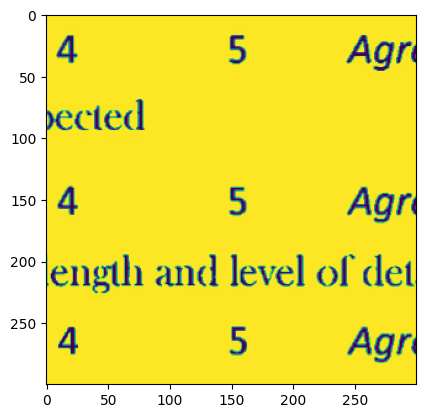

'2023_q7_disagree'

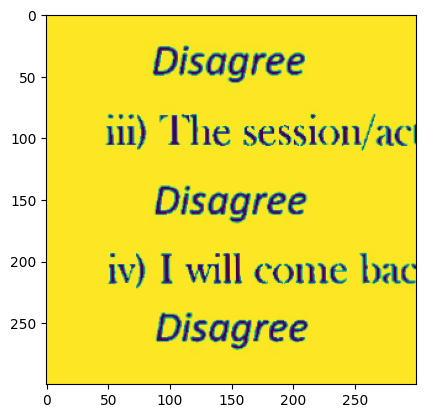

'2023_q7_agree'

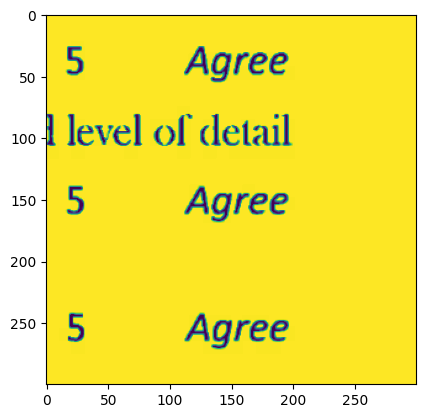

'2023_q7_1'

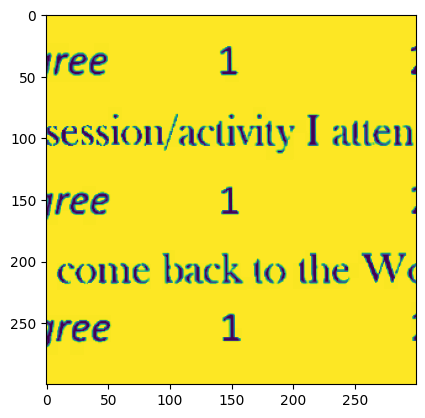

'2023_q7_2'

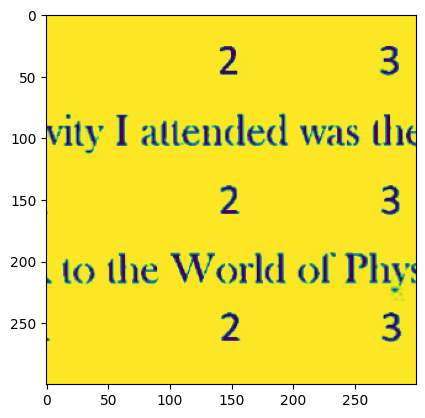

'2023_q7_3'

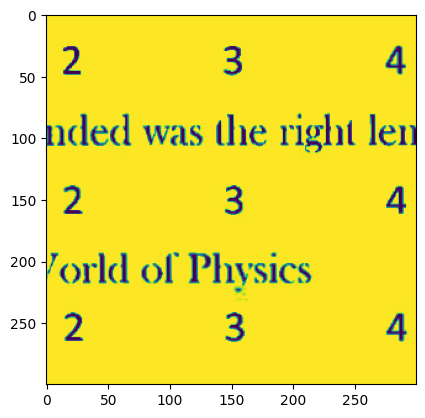

'2023_q7_4'

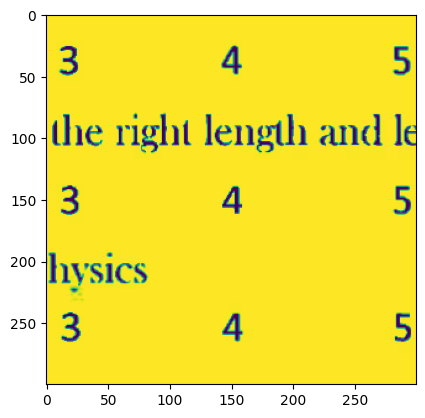

'2023_q7_5'

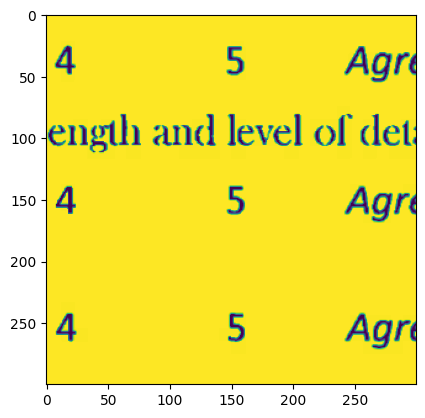

'2023_q8_disagree'

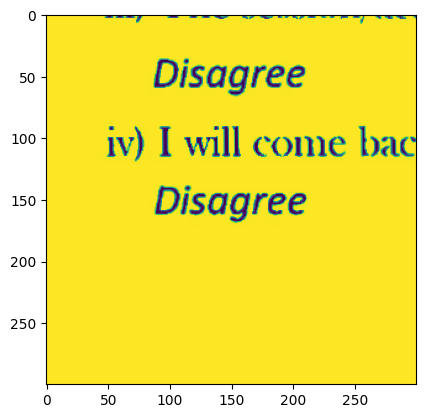

'2023_q8_agree'

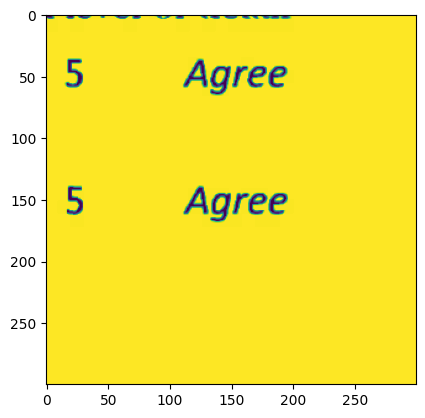

'2023_q8_1'

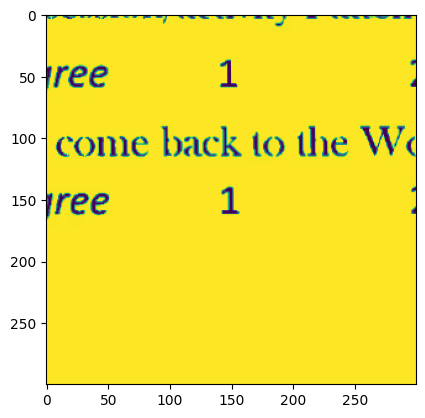

'2023_q8_2'

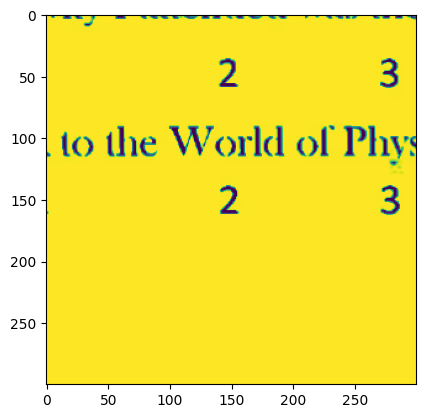

'2023_q8_3'

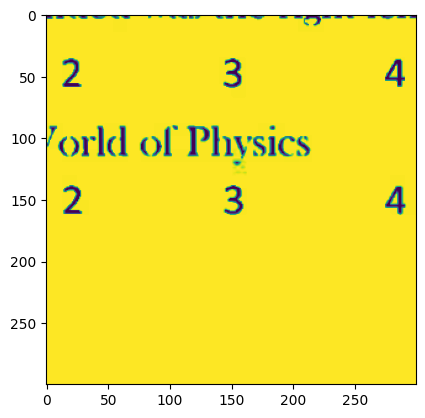

'2023_q8_4'

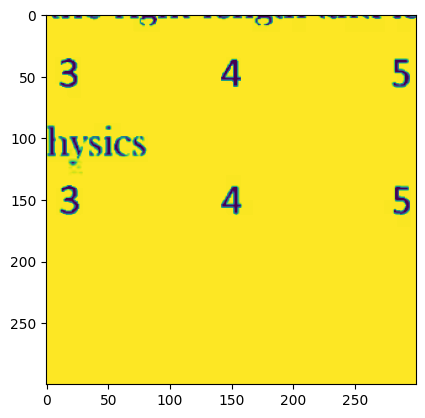

'2023_q8_5'

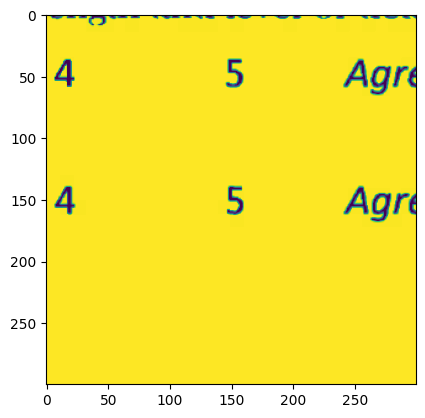

In [192]:
extractor = RegionExtractor()
template = extractor.templates["2023"]
regions = extractor.get_image_regions(template, "2023")
for region, img in regions.items():
    display(region)
    plt.imshow(img)
    plt.show()
# img = regions['2023_q8-1']
# plt.imshow(img)

In [199]:
OUTPUT = Path("output")
PROJ = OUTPUT / "28-13 - chocolate"
ALIGNED = PROJ / "02 - aligned"

In [200]:
images = list(ALIGNED.glob("*.png"))
images.sort()
images

[PosixPath('output/28-13 - chocolate/02 - aligned/01-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/02-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/03-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/04-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/05-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/06-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/07-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/08-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/09-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/10-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/11-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/12-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/13-1-front-2023.png'),
 PosixPath('output/28-13 - chocolate/02 - aligned/1

'2023_q2_q1m - 2521.214598454832'

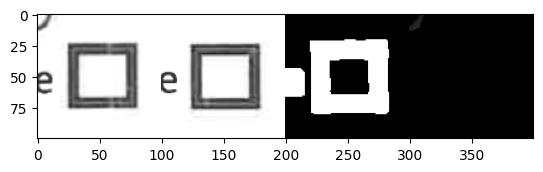

'2023_q2_q1f - 62347.57707709109 - TICKED'

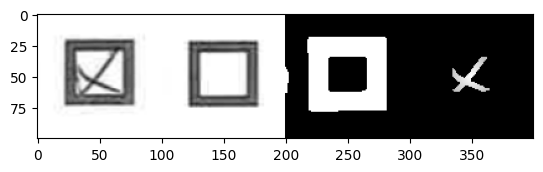

'2023_q2_q1o - 0.0'

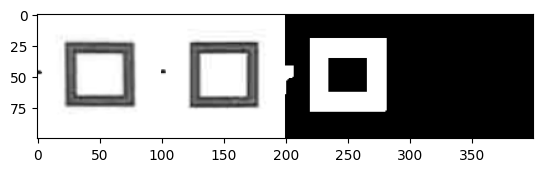

'2023_q3_young - 0.0'

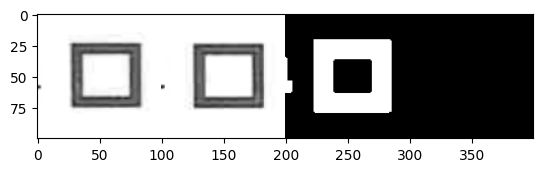

'2023_q3_eleven - 0.0'

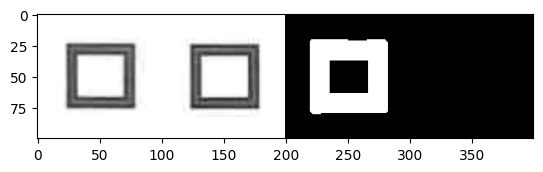

'2023_q3_old - 37728.28283918342 - TICKED'

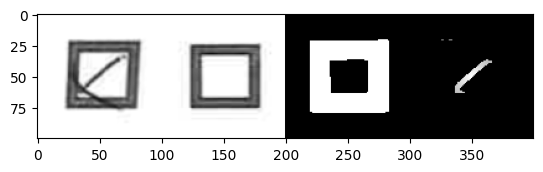

'2023_q4_y - 65118.9514896676 - TICKED'

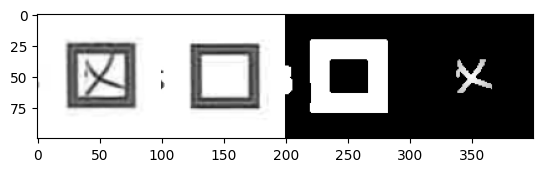

'2023_q4_n - 0.0'

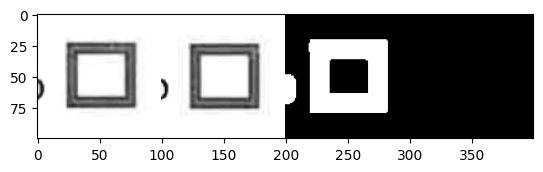

'2023_q5_disagree - 0.0'

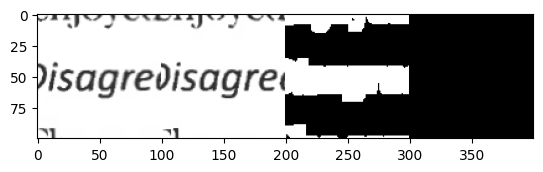

'2023_q5_agree - 96312.14506842064 - TICKED'

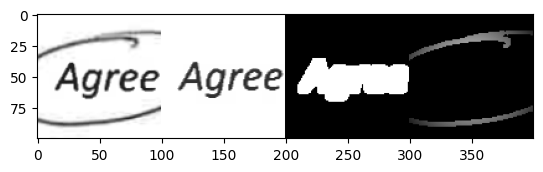

'2023_q5_1 - 0.0'

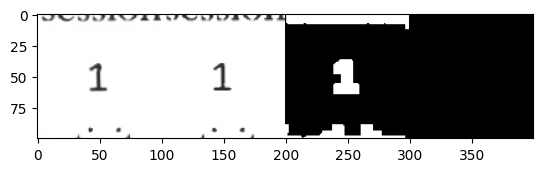

'2023_q5_2 - 0.0'

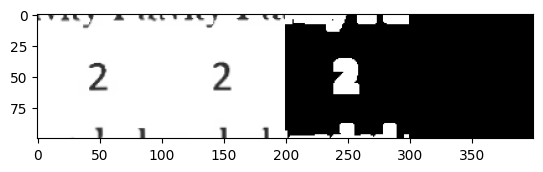

'2023_q5_3 - 0.0'

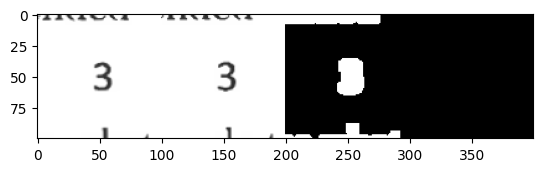

'2023_q5_4 - 0.0'

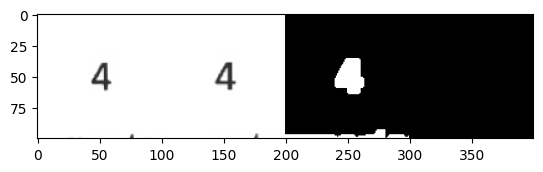

'2023_q5_5 - 106491.59459315115 - TICKED'

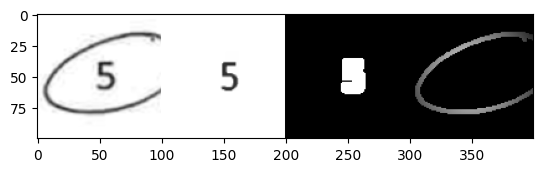

'2023_q6_disagree - 0.0'

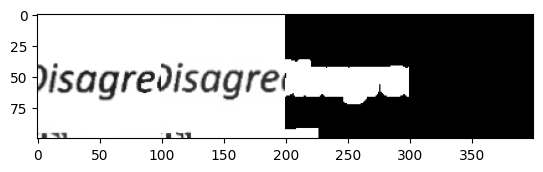

'2023_q6_agree - 0.0'

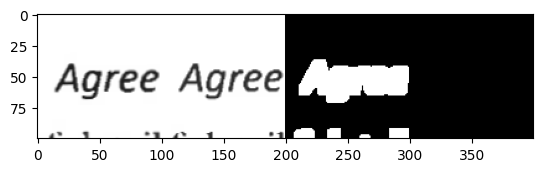

'2023_q6_1 - 0.0'

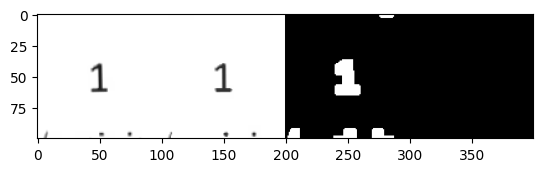

'2023_q6_2 - 0.0'

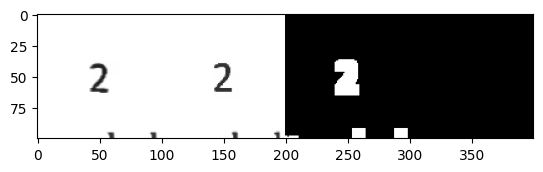

'2023_q6_3 - 0.0'

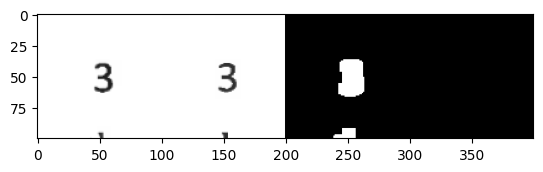

'2023_q6_4 - 127127.55469354942 - TICKED'

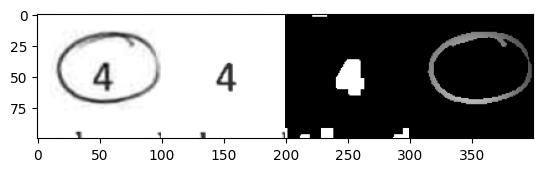

'2023_q6_5 - 0.0'

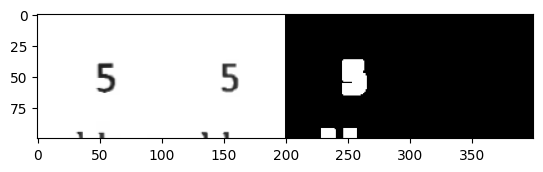

'2023_q7_disagree - 0.0'

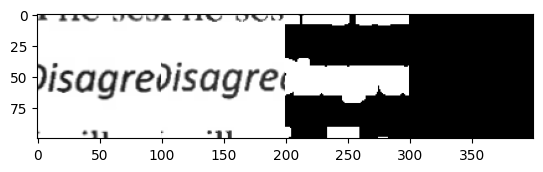

'2023_q7_agree - 0.0'

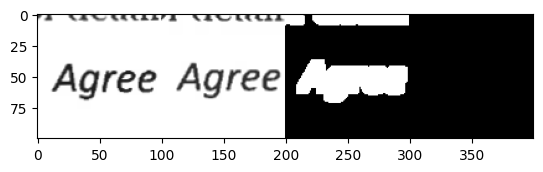

'2023_q7_1 - 0.0'

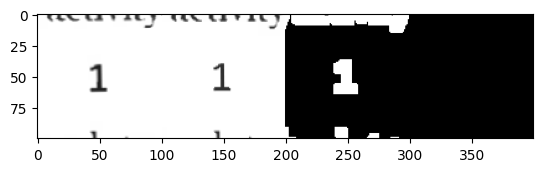

'2023_q7_2 - 0.0'

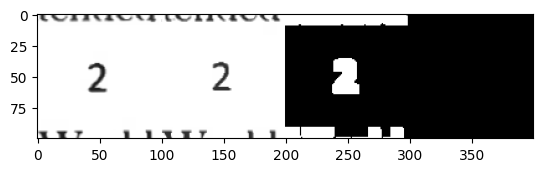

'2023_q7_3 - 0.0'

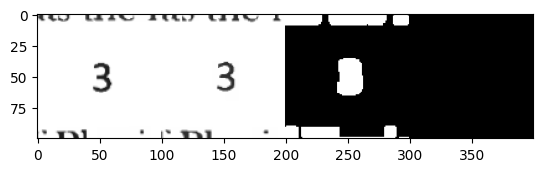

'2023_q7_4 - 127520.20847498576 - TICKED'

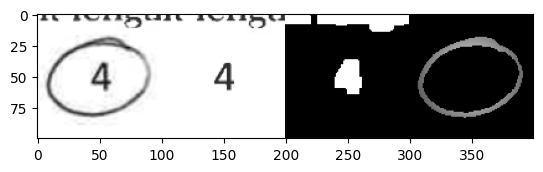

'2023_q7_5 - 0.0'

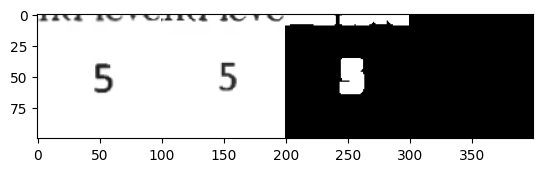

'2023_q8_disagree - 0.0'

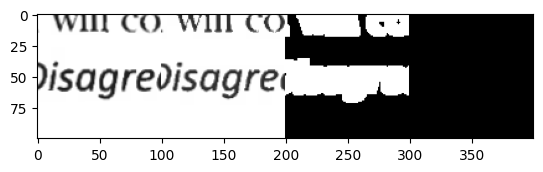

'2023_q8_agree - 119280.13450182861 - TICKED'

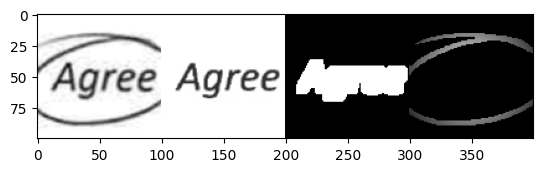

'2023_q8_1 - 0.0'

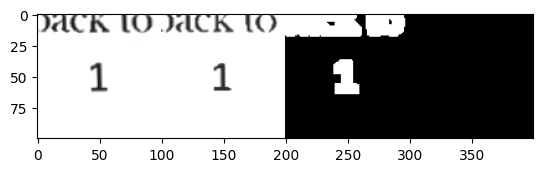

'2023_q8_2 - 0.0'

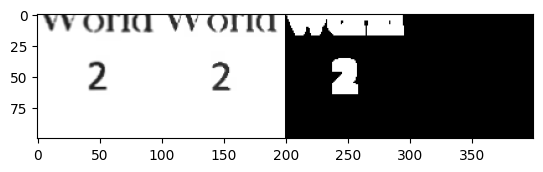

'2023_q8_3 - 0.0'

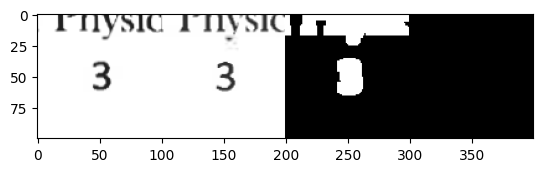

'2023_q8_4 - 0.0'

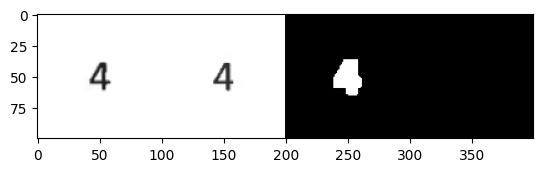

'2023_q8_5 - 99331.36726824139 - TICKED'

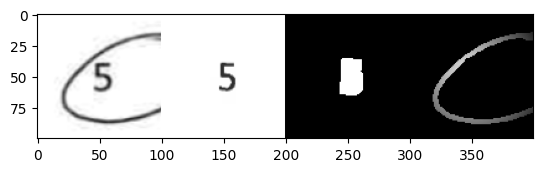

In [202]:
extractor = RegionExtractor()
regions = extractor.extract_regions(images[2])
for key, (img, weight) in regions.items():
    ticked = " - TICKED" if weight > 20_000 else ""
    display(f"{key} - {weight}{ticked}")
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [217]:
def regions():
    for template_name, template in extractor.defintions.items():
        for question_name, question in template.items():
            for box_name, box in question['boxes'].items():
                yield template_name, question_name, f"{box_name}"
list(regions())

[(2022, 'q1', 'q1y'),
 (2022, 'q1', 'q1n'),
 (2022, 'q2', 'q2y'),
 (2022, 'q2', 'q2n'),
 (2022, 'q3', 'q3right'),
 (2022, 'q3', 'q3complicated'),
 (2022, 'q4', 'q4six'),
 (2022, 'q4', 'q4seven'),
 (2022, 'q4', 'q4eight'),
 (2022, 'q4', 'q4nine'),
 (2022, 'q5', 'q5n'),
 (2022, 'q5', 'q5sometimes'),
 (2022, 'q5', 'q5y'),
 (2022, 'q6', 'q6y'),
 (2022, 'q6', 'q6n'),
 (2023, 'q2', 'q1m'),
 (2023, 'q2', 'q1f'),
 (2023, 'q2', 'q1o'),
 (2023, 'q3', 'young'),
 (2023, 'q3', 'eleven'),
 (2023, 'q3', 'old'),
 (2023, 'q4', 'y'),
 (2023, 'q4', 'n'),
 (2023, 'q5', 'disagree'),
 (2023, 'q5', 'agree'),
 (2023, 'q5', '1'),
 (2023, 'q5', '2'),
 (2023, 'q5', '3'),
 (2023, 'q5', '4'),
 (2023, 'q5', '5'),
 (2023, 'q6', 'disagree'),
 (2023, 'q6', 'agree'),
 (2023, 'q6', '1'),
 (2023, 'q6', '2'),
 (2023, 'q6', '3'),
 (2023, 'q6', '4'),
 (2023, 'q6', '5'),
 (2023, 'q7', 'disagree'),
 (2023, 'q7', 'agree'),
 (2023, 'q7', '1'),
 (2023, 'q7', '2'),
 (2023, 'q7', '3'),
 (2023, 'q7', '4'),
 (2023, 'q7', '5'),
 (202